In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [42]:
df = pd.read_csv('superstore_orders.csv') # First dataset

In [43]:
dfa = pd.read_excel('superstore_salesagents.xlsx') # Second dataset

In [44]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Sales Agent ID,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Cost%
0,1,CA-152156-1,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,16,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.10
1,2,CA-152156-2,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,16,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.10
2,3,CA-138688-3,12/06/2019,16/06/2019,Second Class,DV-13045,Darrin Van Huff,4,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.10
3,4,US-108966-4,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,9,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45
4,5,US-108966-5,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,9,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          7385 non-null   int64  
 1   Order ID        7385 non-null   object 
 2   Order Date      7385 non-null   object 
 3   Ship Date       7385 non-null   object 
 4   Ship Mode       7385 non-null   object 
 5   Customer ID     7385 non-null   object 
 6   Customer Name   7385 non-null   object 
 7   Sales Agent ID  7385 non-null   object 
 8   Country/Region  7385 non-null   object 
 9   City            7385 non-null   object 
 10  State           7385 non-null   object 
 11  Postal Code     7375 non-null   float64
 12  Region          7385 non-null   object 
 13  Product ID      7385 non-null   object 
 14  Category        7385 non-null   object 
 15  Sub-Category    7385 non-null   object 
 16  Product Name    7385 non-null   object 
 17  Sales           7385 non-null   f

In [45]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sales Agent Id  49 non-null     int64 
 1   Name            49 non-null     object
 2   Surname         49 non-null     object
 3   Level           49 non-null     object
 4   State           49 non-null     object
 5   Age             49 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


In [64]:
Shipping = df['Ship Mode'].value_counts()
Shipping

Standard Class    4466
Second Class      1427
First Class       1103
Same Day           389
Name: Ship Mode, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

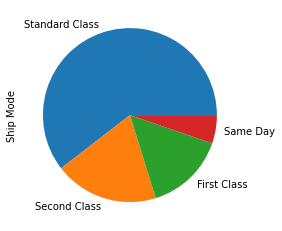

In [25]:
df['Ship Mode'].value_counts().plot.pie()

In [26]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Cost%
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,4980.283819,54933.033717,233.399052,3.788084,0.204895
std,2913.972271,32034.170383,648.523613,2.216888,0.174531
min,1.000000,1040.000000,0.556000,1.000000,0.100000
25%,2436.000000,22304.000000,17.220000,2.000000,0.100000
50%,4979.000000,55407.000000,54.384000,3.000000,0.200000
75%,7524.000000,90004.000000,211.246000,5.000000,0.200000
max,9993.000000,99301.000000,22638.480000,14.000000,0.800000


In [27]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Sales Agent ID    0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Cost%             0
dtype: int64


In [13]:
region_order_count = df['Region'].value_counts()
region_order_count

West       2341
East       2109
Central    1731
South      1204
Name: Region, dtype: int64

                 sum
Region              
West     539710.0710
East     493981.0040
Central  398054.9434
South    291905.9830


Text(0.5, 1.0, 'Total Sales by Region')

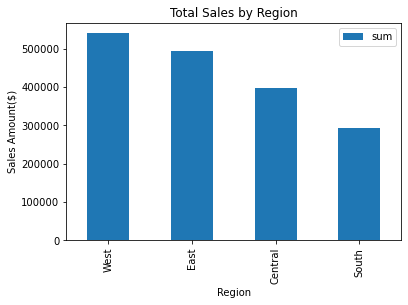

In [14]:
region_gross_sales = df.groupby(['Region']).Sales.agg([sum]).sort_values(by='sum', ascending=False)
region_gross_sales.plot(kind='bar')
region_gross_sales.round(2)
print(region_gross_sales)
plt.ylabel('Sales Amount($)')
plt.xlabel('Region')
plt.title('Total Sales by Region')

In [15]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the Customers as per the sales
Top_customers = Top_customers[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_customers.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 

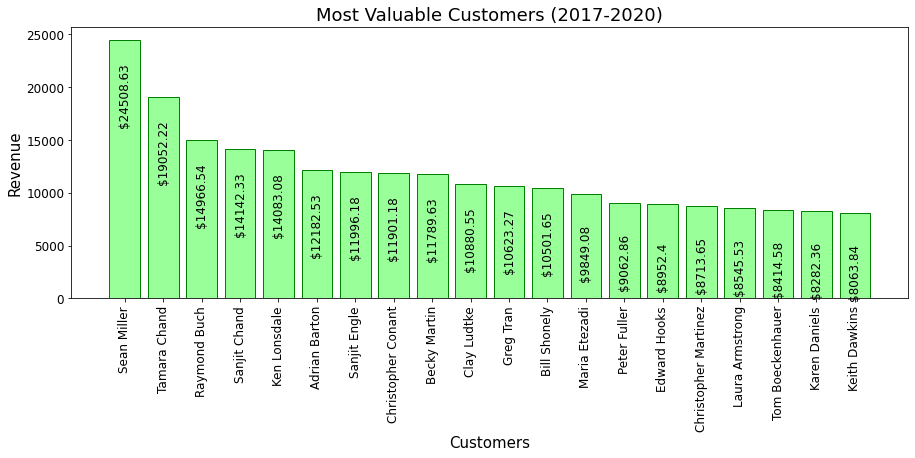

In [17]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2017-2020)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [18]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe

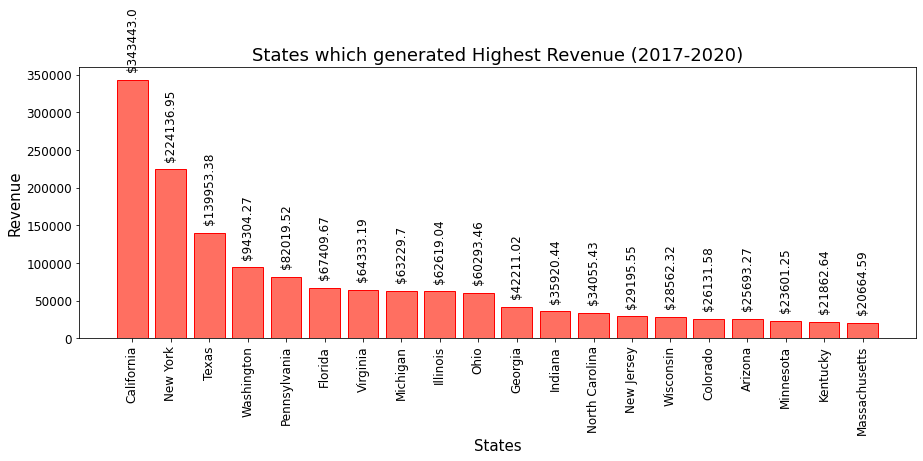

In [20]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("States which generated Highest Revenue (2017-2020)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

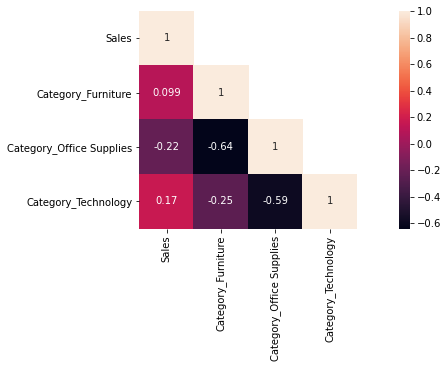

In [49]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(15,4)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

Text(0, 0.5, 'Average daily sales per week')

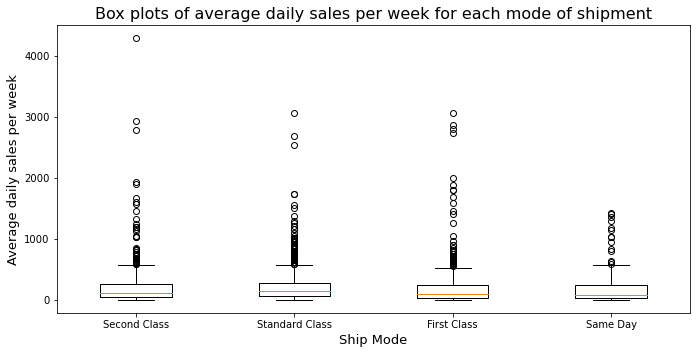

In [55]:
data = df.groupby(['Ship Mode','Order Date'])['Sales'].mean()
L = [data[j] for j in df['Ship Mode'].unique()]
Lx = list(df['Ship Mode'].unique())
fig8 = plt.figure(figsize=(11,5))
axes8 = fig8.add_axes([0.1,0.1,0.8,0.8])
axes8.boxplot(x=L,labels =Lx)
axes8.set_title('Box plots of average daily sales per week for each mode of shipment',fontsize=16)
axes8.set_xlabel('Ship Mode',fontsize=13)
axes8.set_ylabel('Average daily sales per week',fontsize=13)

In [59]:
col = df.columns
print(col)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Sales Agent ID', 'Country/Region',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Cost%'],
      dtype='object')


<AxesSubplot:>

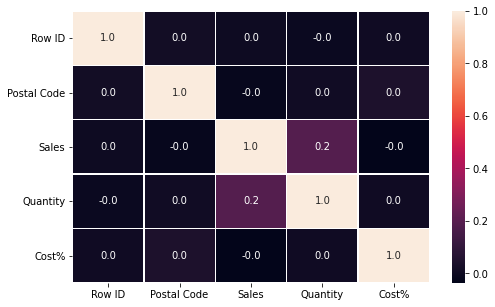

In [61]:
#correlation map
f,ax =plt.subplots(figsize=(8, 5)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 